 ## package installed

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt       
import seaborn as sns                
import warnings                       
warnings.filterwarnings("ignore")

In [3]:
def featStat(featureName, constrain,plotType):
    feat = df[featureName][df[featureName]>0]
    data = df[[featureName,'winPlacePerc']].copy()
    q99 = int(data[featureName].quantile(0.99))
    plt.rcParams['figure.figsize'] = 15,5;   
    
    if constrain!=None:
        feat = feat[feat<constrain]
    if plotType == 'hist':
        plt.subplot(1,2,1)
        feat.hist(bins=50);
        plt.title(featureName);
        
        n = 20
        cut_range = np.linspace(0,q99,n)
        cut_range = np.append(cut_range, data[featureName].max())
        data[featureName] = pd.cut(data[featureName],
                                         cut_range,
                                         labels=["{:.0f}-{:.0f}".format(a_, b_) for a_, b_ in zip(cut_range[:n], cut_range[1:])],
                                         include_lowest=True
                                        )
        ax = plt.subplot(1,2,2)
        sns.boxplot(x="winPlacePerc", y=featureName, data=data, ax=ax, color="#2196F3")
        ax.set_xlabel('winPlacePerc', size=14, color="#263238")
        ax.set_ylabel(featureName, size=14, color="#263238")
        plt.gca().xaxis.grid(True)
        plt.tight_layout()
           
    if plotType == 'count':        
        plt.subplot(1,2,1)
        sns.countplot(feat, color="#2196F3");
        
        plt.subplot(1,2,2)
        data.loc[data[featureName] > q99, featureName] = q99+1
        x_order = data.groupby(featureName).mean().reset_index()[featureName]
        x_order.iloc[-1] = str(q99+1)+"+"
        data[featureName][data[featureName] == q99+1] = str(q99+1)+"+"
        
        ax = sns.boxplot(x=featureName, y='winPlacePerc', data=data, color="#2196F3", order = x_order);
        ax.set_xlabel(featureName, size=14, color="#263238")
        ax.set_ylabel('WinPlacePerc', size=14, color="#263238")
    plt.tight_layout()

## Import data

In [4]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Advanced_ML/data_project/train_V2.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [ ]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [6]:
df['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [ ]:
df = df.drop(df.columns[[0,1,2]],axis=1)

In [ ]:
 from sklearn.preprocessing import LabelEncoder
 le=LabelEncoder()
 df['matchType']=le.fit_transform(df['matchType'])

In [ ]:
df['matchType']

0          15
1          15
2           2
3          15
4          13
           ..
4446961    15
4446962    12
4446963    15
4446964    15
4446965    13
Name: matchType, Length: 4446966, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int64  
 1   boosts           int64  
 2   damageDealt      float64
 3   DBNOs            int64  
 4   headshotKills    int64  
 5   heals            int64  
 6   killPlace        int64  
 7   killPoints       int64  
 8   kills            int64  
 9   killStreaks      int64  
 10  longestKill      float64
 11  matchDuration    int64  
 12  matchType        int64  
 13  maxPlace         int64  
 14  numGroups        int64  
 15  rankPoints       int64  
 16  revives          int64  
 17  rideDistance     float64
 18  roadKills        int64  
 19  swimDistance     float64
 20  teamKills        int64  
 21  vehicleDestroys  int64  
 22  walkDistance     float64
 23  weaponsAcquired  int64  
 24  winPoints        int64  
 25  winPlacePerc     float64
dtypes: float64(6), int64(20)
memory usage: 882

## EDA（Correlation）

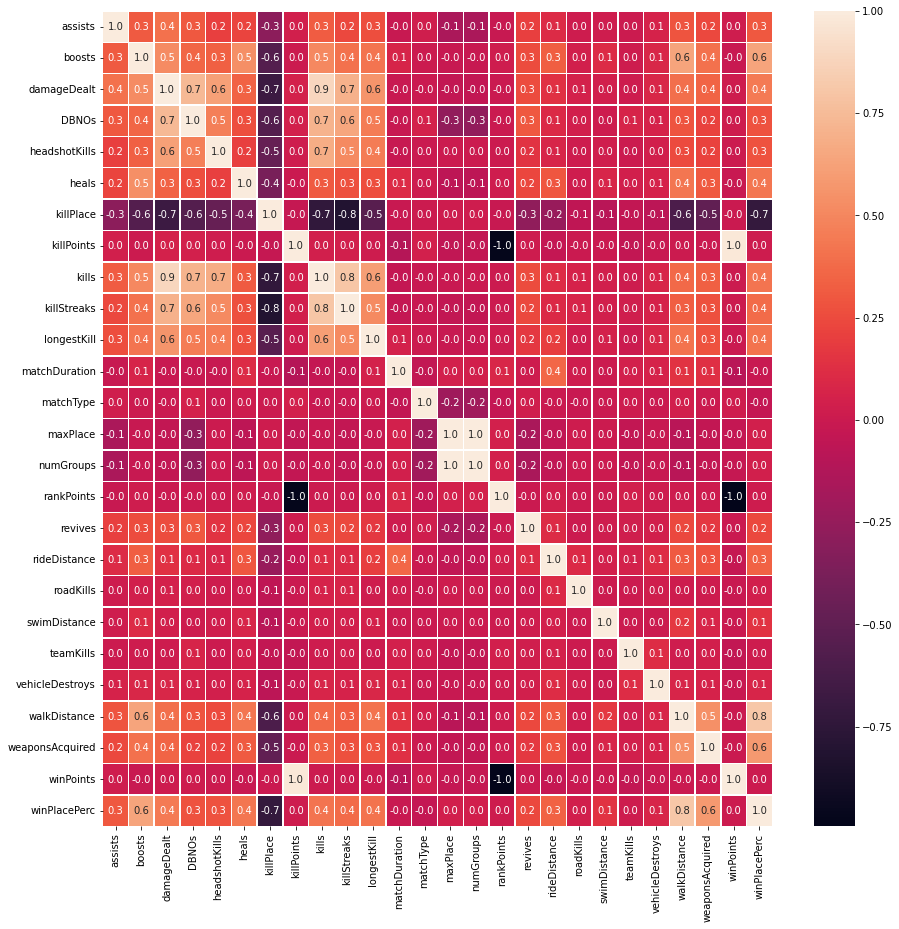

In [ ]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
#Explore walkDistance, boosts, weaponsAcuqired and killPlace with highly correlation with target variable
new_df = df[['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired',
       'killPlace']]

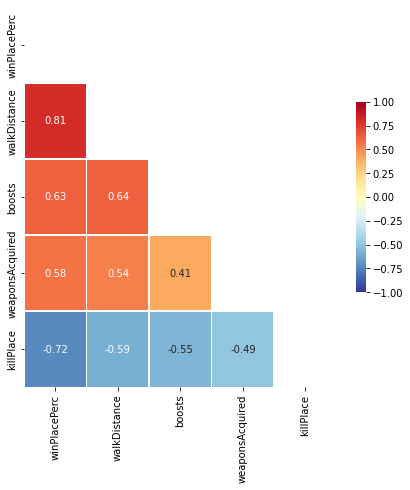

In [ ]:
corr = new_df.corr()
fig, ax = plt.subplots( figsize=(7,7) )
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,      
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

In [ ]:
#boosts
df['boosts']

0          0
1          0
2          0
3          0
4          0
          ..
4446961    0
4446962    1
4446963    0
4446964    4
4446965    2
Name: boosts, Length: 4446966, dtype: int64

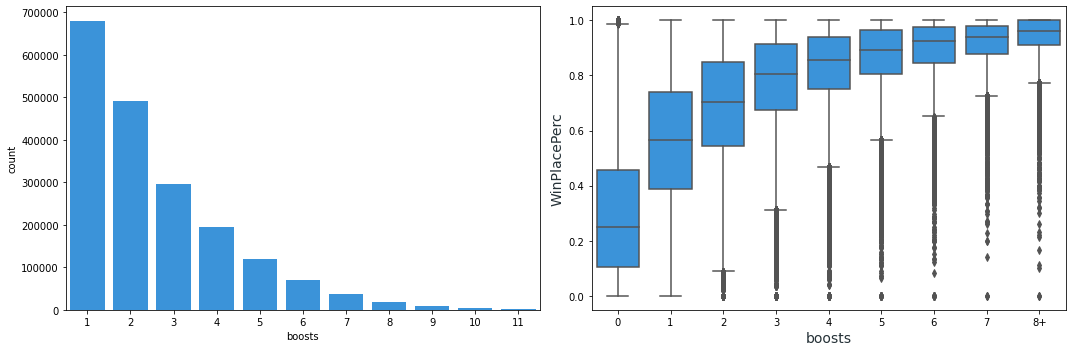

In [ ]:
featStat('boosts',12,'count')

In [ ]:
df['killPlace']

0          60
1          57
2          47
3          75
4          45
           ..
4446961    74
4446962    69
4446963    66
4446964    11
4446965    18
Name: killPlace, Length: 4446966, dtype: int64

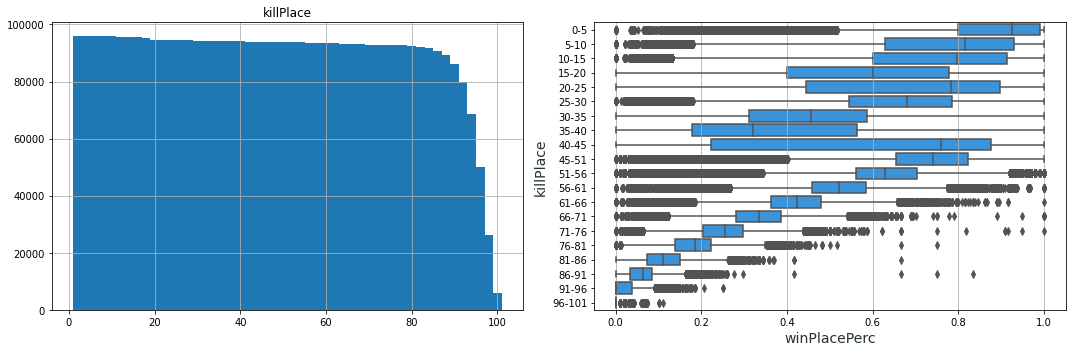

In [ ]:
featStat('killPlace',400,'hist')

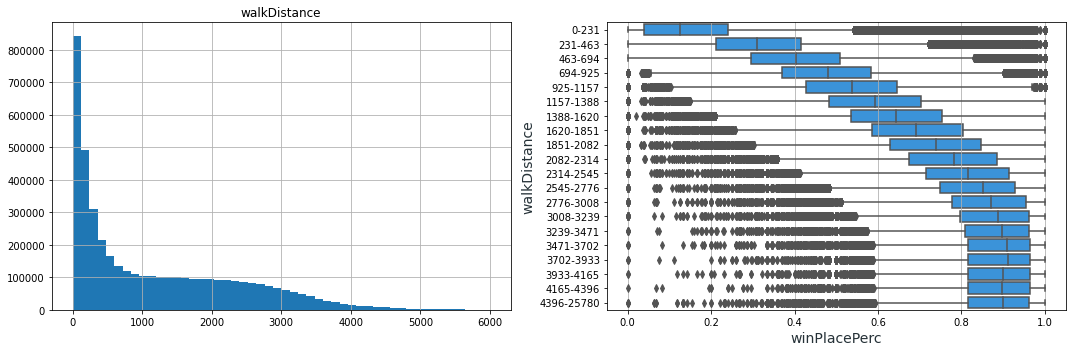

In [ ]:
featStat('walkDistance',6000,'hist')

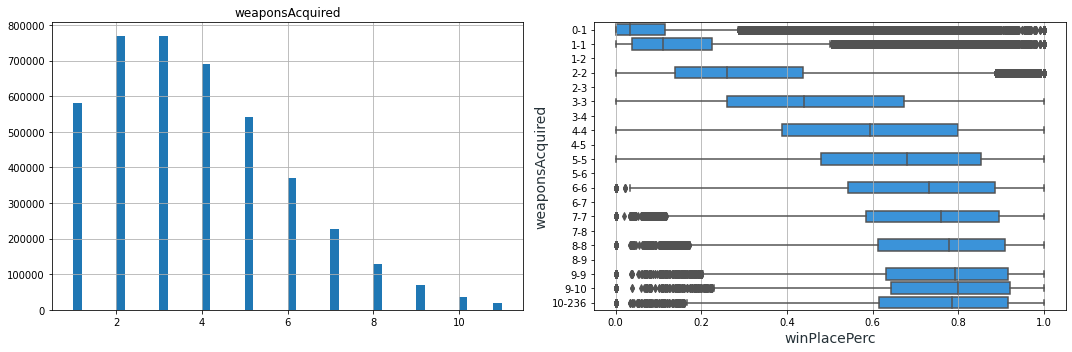

In [ ]:
featStat('weaponsAcquired',12,'hist')